In [2]:
import pylab
import numpy as np
from qiskit import BasicAer, Aer, QuantumCircuit, execute
from qiskit.tools.visualization import plot_histogram
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import TruthTableOracle
from qiskit.circuit.library.grover_operator import GroverOperator


In [57]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "Diffusor"
    return U_s

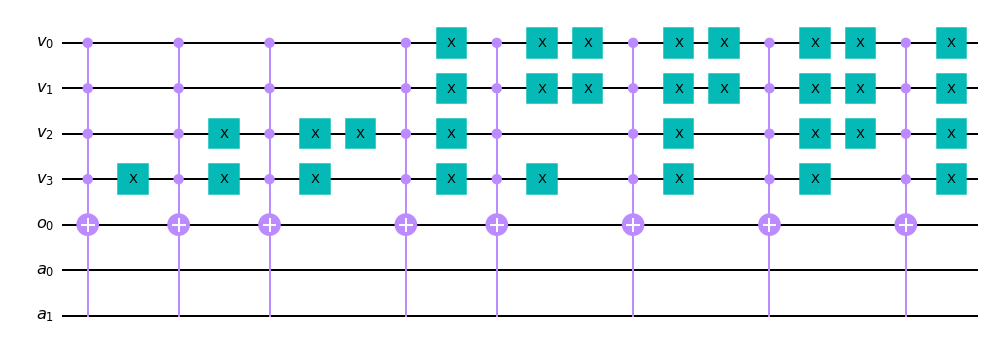

In [3]:
n = 3
truthtable = '1001100110011001'
oracle = TruthTableOracle(truthtable)
oracle.circuit.draw()

In [19]:
backend = Aer.get_backend('unitary_simulator')
job = execute(oracle.circuit, backend)
result = job.result()
unitary_array = result.get_unitary(oracle.circuit, decimals=3)

np.set_printoptions(linewidth=1200, precision=1)

array_np = np.asarray(unitary_array)

#low_values_flags = array_np < 0.1
#array_np[low_values_flags] = 0 

print(array_np)

[[-6.3e-32+5.3e-32j  0.0e+00+0.0e+00j  0.0e+00+0.0e+00j ...  0.0e+00+0.0e+00j  0.0e+00+0.0e+00j  0.0e+00+0.0e+00j]
 [ 0.0e+00+0.0e+00j  1.0e+00-4.1e-16j  0.0e+00+0.0e+00j ...  0.0e+00+0.0e+00j  0.0e+00+0.0e+00j  0.0e+00+0.0e+00j]
 [ 0.0e+00+0.0e+00j  0.0e+00+0.0e+00j  1.0e+00-4.9e-16j ...  0.0e+00+0.0e+00j  0.0e+00+0.0e+00j  0.0e+00+0.0e+00j]
 ...
 [ 0.0e+00+0.0e+00j  0.0e+00+0.0e+00j  0.0e+00+0.0e+00j ...  1.0e+00-1.4e-15j  0.0e+00+0.0e+00j  0.0e+00+0.0e+00j]
 [ 0.0e+00+0.0e+00j  0.0e+00+0.0e+00j  0.0e+00+0.0e+00j ...  0.0e+00+0.0e+00j  1.0e+00-1.4e-15j  0.0e+00+0.0e+00j]
 [ 0.0e+00+0.0e+00j  0.0e+00+0.0e+00j  0.0e+00+0.0e+00j ...  0.0e+00+0.0e+00j  0.0e+00+0.0e+00j  1.5e-31+9.6e-32j]]


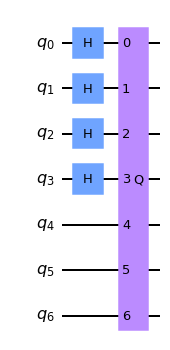

In [4]:


grover = Grover(oracle)


grover.construct_circuit().draw()


#qc.append(grover.construct_circuit(), [0,1,2,3,4])
#qc.append(diffuser(3), [0, 1, 2,])
#qc.draw()
#result = qc.run(QuantumInstance(BasicAer.get_backend('qasm_simulator'), shots=1024))
#plot_histogram(result["measurement"])


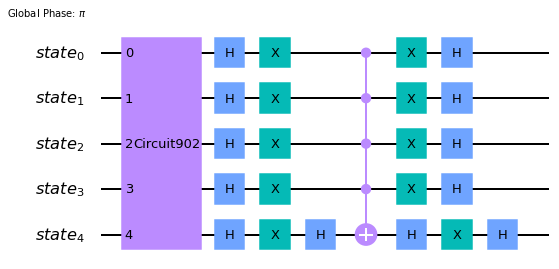

In [126]:
oqc = QuantumCircuit(5)
oqc.append(oracle.circuit, [0,1,2,3,4])
groverop = GroverOperator(oqc)


groverop.draw()

In [115]:
result = grover.run(QuantumInstance(BasicAer.get_backend('qasm_simulator'), shots=1024))
plot_histogram(result["measurement"])

AttributeError: 'GroverOperator' object has no attribute 'run'

In [116]:
emulator = Aer.get_backend('qasm_simulator')
job = execute(grover, emulator, shots=1024 )
print(job.result().get_counts())
#hist = job.result().get_counts()
#plot_histogram(hist)

QiskitError: 'No counts for experiment "0"'